## Introduction

This tutorial will introduce you to Monte Carlo simulations. Broadly, a Monte Carlo simulation is a probabilistic approximation technique that uses repeated random sampling to estimate a numerical solution.

### Motivation

There are many different data science problems where directly computing a solution is difficult or impossible. Monte Carlo simulations are useful in this setting because they allow us to reduce the complicated problem to a simple expected value problem through the use of simulated random quantities. Monte Carlo simulations have a broad range of applications and are used in many fields, including finance, computational biology, artificial intelligence, and sensitivity analysis.

### Tutorial Content

We will cover the following topics in this tutorial:
- [Mathematical Formulation](#Mathematical-Formulation)
- [Libraries](#Libraries)
- [Example: Estimating Pi](#Example:-Estimating-$\pi$)
- [Application: Finance](#Application:-Finance)
- [Summary](#Summary)
- [Further Resources](#Further-Resources)

## Mathematical Formulation

In mathematical terms, the goal of a Monte Carlo simulation is to approximate the expected value of a function applied to a random variable. We usually apply this technique to functions where precisely determing the expectation is impossible or computationally expensive. Instead of directly calculating the expectation, we can approximate it using repeated random sampling from the distribution.

Formally, let $D$ be a probability distribution, and let $X \sim D$. Let $x_1, x_2, \dots, x_n$ be randomly sampled points from $D$, and let $f$ be a real-valued function. Then

$$ E[f(X)] = \lim\limits_{n\to \infty} \frac{1}{n}\sum_{i=1}^{n}f(x_i) $$

Intuitively, we are estimating the solution to an intractable problem by performing many trial runs. We then use the Law of Large Numbers to say that if we perform enough trial runs, then the actual solution will be approximately equal to the average of all the solutions from the trial runs.

## Libraries

We load the libraries we will use in the following examples, including a pseudorandom number generator and plotting functionality.

In [1]:
%matplotlib inline

import random
import math
import matplotlib.pyplot as plt
import numpy as np

We initialize the pseudorandom generator with a seed value of $0$.

In [2]:
random.seed(0)

## Example: Estimating $\pi$

A classic example of a Monte Carlo simulation involves randomly sampling points from a square in order to numerically estimate $\pi$. 

### Mathematical Setup

Consider a circle inscribed in a square, as pictured below.

<img src="MonteCarloIntegrationCircle.png" width="400" height="400"/>

If we let $r$ be the radius of the circle, then the length of each side of the square is $2r$. We know that the area of a circle is given by 

$$A_{c} = \pi r^2$$

and the area of a square is 

$$A_{s} = (2r)^2 = 4r^2$$

Then the ratio of the area of the circle to the area of the square is 

$$\frac{A_c}{A_s} = \frac{\pi r^2}{4r^2} = \frac{\pi}{4}$$

Observe that if we uniformly generate points within the square, then $\frac{\pi}{4}$ of these points should also lie within the circle in expectation. This observation gives us an idea for a method to numerically estimate the value of $\pi$. Let $n$ be the total number of data points randomly sampled from the square, and let $m$ be the number of these data points that also lie within the circle. Then 

$$\lim\limits_{n\to \infty} \frac{m}{n} = \frac{\pi}{4}$$

Solving this equation for $\pi$ yields 

$$\pi \approx \frac{4m}{n}$$ 

for sufficiently large $n$.

In the following code, we will use the square centered at the origin with side length $2$ and the unit circle. Note that we can check if each randomly sampled point $(x,y)$ lies within the circle by using the distance formula. Specifically, $(x,y)$ also lies within the circle if 

$$x^2 + y^2 \leq r^2 = 1$$

### Helper Functions

In [3]:
# Returns a uniformly random point within the square [-1,1] x [-1,1]
def generateRandomPoint():
    x = random.uniform(-1,1)
    y = random.uniform(-1,1)
    return (x,y)

# Returns True if the given point lies inside the unit circle and False otherwise
def inCircle((x,y)):
    return x**2 + y**2 <= 1

# Uses the above described procedure to estimate pi, where n is the number of iterations
def estimatePi(n):
    m = 0
    for i in range(n):
        point = generateRandomPoint()
        if inCircle(point):
            m += 1
    return 4.0*m/n

### Running the Simulation

The following code uses our `estimatePi` function to estimate the value of $\pi$ for $n = 10^1, 10^2,\dots, 10^6$. Note that as $n$ increases, our approximation converges to the actual value of $\pi$.

In [4]:
max_exp = 6
for i in range(max_exp):
    n = 10**(i+1)
    pi = estimatePi(n)
    print "n = " + str(n) + ":"
    print "pi approximately equals " + str(pi)

n = 10:
pi approximately equals 3.2
n = 100:
pi approximately equals 3.28
n = 1000:
pi approximately equals 3.02
n = 10000:
pi approximately equals 3.1448
n = 100000:
pi approximately equals 3.1306
n = 1000000:
pi approximately equals 3.141768


## Application: Finance

An extremely important problem in finance is pricing derivative securities whose future payoff is unknown at the current time. We can use Monte Carlo simulations to estimate the price using the discounted expected value of the future payoff.

### Preliminaries

In this tutorial, we will focus on a specific type of derivative security, called a **call option**. A call option gives the buyer the right, but not the obligation, to buy a specified quantity of the underlying instrument from the seller at a certain time (the expiration time) at a certain price (the strike price). If we let $K$ denote the strike price and let $S_T$ be the price of the underlying at time $T$, then the payoff of the call option at expiration is given by

$$ \text{max}(S_T - K, 0) $$

We will also need the concept of a **discount factor**. Formally, the discount factor $d(t)$ is the amount of money we need to invest at time $0$ in order to have $\$1$ at time $t$. We can also think of it as the present value of receiving $\$1$ at some time $t$ in the future.

The current price of a call option should be the discounted expected value of its future payoff. Let $P$ be the current price of the option, and let $T$ be the expiration date. We will randomly sample $n$ future stock prices $s_1, s_2, \dots, s_n$. Then we can estimate the current price of the option using

$$P = d(T) \frac{1}{n}\sum_{i=1}^{n} \text{max}(s_i - K, 0) $$

In order to use this formula, we need a model for the distribution of the stock price (since this is the distribution we will be sampling from). Here, we will model stock prices using a **geometric Brownian motion**. This is the most common method for modeling stock prices and is also used in the famous Black-Scholes model. When using a geometric Brownian motion, the stock price evolves according to

$$S_t = S_0 \text{exp}((\mu - \frac{\sigma^2}{2})t + \sigma W_t) $$

where $S_0$ is in the initial stock price, $\mu$ is the percentage drift, $\sigma$ is the percentage volatility, and $W_t$ is a **Wiener process** (meaning that $W_t - W_0 \sim N(0, t)$). Intuitively, this means that the stock price is lognormally distributed, i.e. the percent returns on the stock price follow a normal distribution.

More information about geometric Brownian motions and Wiener processes can be found here: 
- https://en.wikipedia.org/wiki/Geometric_Brownian_motion 
- https://en.wikipedia.org/wiki/Wiener_process


### Implementation

The following functions implement this Monte Carlo simulation.

In [5]:
# Parameters: current stock price S_0, volatility v, risk-free interest rate r, time T
# Assumes a lognormal distribution for the stock price at time T
# Returns a stock price randomly sampled from this distribution
def generateStockPrice(S_0, v, r, T):
    Z = random.gauss(0, math.sqrt(T)) # takes mean and std dev
    return S_0 * math.exp((r - 0.5*v**2)*T + v*Z)#*math.sqrt(T))

# Given the stock price at time T and the strike price K, returns the payoff of a call at time T
def callPayoff(S_T, K):
    return max(S_T - K, 0)

# Given the risk-free interest rate r, returns the discount factor for time T
def discountFactor(r, T):
    return math.exp(-r*T)

# Run the simulation to price the call, using n stock prices randomly sampled from the stock price distribution
def priceCall(S_0, v, r, T, K, n):
    total = 0
    for i in range(n):
        S_T = generateStockPrice(S_0, v, r, T)
        payoff = callPayoff(S_T, K)
        total += payoff
    EV = total/n
    p = discountFactor(r,T) * EV # discounted expected value
    return p

### The Distributions of the Future Stock Price and the Call Option Payoff

To get an understanding of the relevant distributions, the following code generates $n = 1000$ stock prices at time $ T = 1$. It then displays these in a histogram, and also plots the histogram of the corresponding call option payoffs.

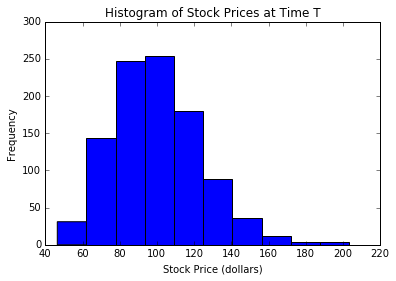

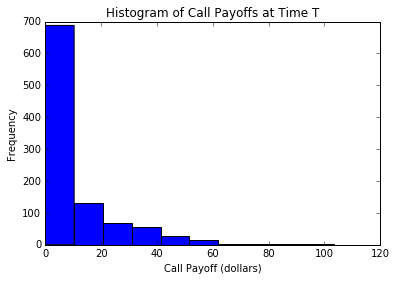

In [7]:
n = 1000

# Sample parameters
S_0 = 100 # stock currently trading at $100
v = 0.25  # volatility of 25%
r = 0.01  # risk-free interest rate of 1%
T = 1     # time to expiration is 1 year
K = 100   # 'at the money' call (since K = S_0)

S = []
P = []
for i in range(n):
    S_T = generateStockPrice(S_0, v, r, T)
    payoff = callPayoff(S_T, K)
    S.append(S_T)
    P.append(payoff)
    
plt.hist(S)
plt.title("Histogram of Stock Prices at Time T")
plt.xlabel("Stock Price (dollars)")
plt.ylabel("Frequency")
plt.show()

p = plt.hist(P)
plt.title("Histogram of Call Payoffs at Time T")
plt.xlabel("Call Payoff (dollars)")
plt.ylabel("Frequency")
plt.show()

These histograms match what we should expect. The distribution of stock price is approximately lognormal (the percent returns are normally distributed). We see that the distribution is skewed to the right with the mean greater than the median. This reflects our general belief that stock prices tend to increase over time.

The distribution of the at the money call option payoff is quite right skewed. This reflects that call options have an asymmetric payout strucutre: the upside is large but the loss is limited (since the payoff can never fall below zero, even if the stock price plummets).

### Example: Running the Simulation to Estimate the Price of a Call Option on Apple

We now use our code to estimate the price of April 115-strike call on AAPL. Using data as of October 15, 2016, we set

$$ S_0 = 117.63 $$
$$ \sigma = 23\% $$
$$ r = 0.46\% $$
$$ T = 0.5 $$
$$ K = 115 $$

We then use our `priceCall` function for $n = 10^1, 10^2,\dots, 10^6$. Note that the current call price is simply the discounted expected value of the payoffs at time $T$.

In [8]:
# Parameters for the April 115 call on AAPL as of 10/15/2016
S_0 = 117.63
v = 0.23
r = 0.0046
T = 0.5
K = 115

max_exp = 6
for i in range(max_exp):
    n = 10**(i+1)
    p = priceCall(S_0, v, r, T, K, n)
    print "n = " + str(n) + ":"
    print "The price is approximately " + str(p)

n = 10:
The price is approximately 17.9422592345
n = 100:
The price is approximately 9.98089769917
n = 1000:
The price is approximately 9.20931708888
n = 10000:
The price is approximately 8.97168521333
n = 100000:
The price is approximately 9.08347855596
n = 1000000:
The price is approximately 9.07861512303


At the time I wrote this simulation, the April 115 call on AAPL was trading in the market at $\$9.05$. Using a simple model, our estimate comes fairly close to the market price.

### Example: Asian Option

We can also use a similar approach to price more complicated financial securities. For example, an **average-rate Asian call option** pays out based on the average stock price (as opposed to the final stock price). We replace the final stock price with the average stock price in the payoff formula, so that the payoff for this option is given by

$$ \text{max}(\text{avg}\{S_i : 0 \leq i \leq T\} - K, 0) $$

where $\text{avg}\{S_i : 0 \leq i \leq T\}$ denotes the average stock price between time $0$ and time $T$.

In order to price this option, we will need to keep track of the path that the stock price takes between time $0$ and time $T$, in addition to the final stock price at time $T$. The following function accomplishes this by modeling and recording the stock price move for every day between time $0$ and the finishing time $T$. It returns a list of stock prices over time (the length of this list is the number of days until time $T$).

In [9]:
# Returns a list of stock prices. First element is the stock price on day 1,
# second element is the stock price on day 2, ... , last element is the stock
# price on the day T*365 (since T is in years)
def generateStockPath(S_0, v, r, T):
    numDays = T*365
    S_yesterday = S_0
    S = []
    for i in range(int(numDays)):
        S_today = generateStockPrice(S_yesterday, v, r, 1.0/365)
        S_yesterday = S_today
        S.append(S_today)
    return S

We can now modify our `priceCall` function from before to reflect this modified payout structure. We will pass the mean stock price into the `callPayoff` function (instead of the final stock price).

In [10]:
def priceAsianCall(S_0, v, r, T, K, n):
    total = 0
    for i in range(n):
        P = generateStockPath(S_0, v, r, T)
        A = np.mean(P) # average stock price between time 0 and time T
        payoff = callPayoff(A, K) # use average stock price, instead of final stock price here
        total += payoff
    EV = total/n
    p = discountFactor(r,T) * EV
    return p

We now use our function to estimate the price of an Asian call option with the following parameters.

In [11]:
S_0 = 25
v = 0.35
r = 0.055
T = 0.5
K = 20

max_exp = 6
for i in range(max_exp):
    n = 10**(i+1)
    p = priceAsianCall(S_0, v, r, T, K, n)
    print "n = " + str(n) + ":"
    print "The price is approximately " + str(p)

n = 10:
The price is approximately 5.16870907085
n = 100:
The price is approximately 5.3121425976
n = 1000:
The price is approximately 5.34926506541
n = 10000:
The price is approximately 5.17987758042
n = 100000:
The price is approximately 5.2644458611
n = 1000000:
The price is approximately 5.25891721865


We notice that it takes more iterations for this approximation to converge. This makes sense, as there is more variance in simulating the entire price path of the stock than just the final price.

## Summary

A Monte Carlo simulation is a powerful computational tool that can reduce complicated problems into a far simpler expected value problem based on random sampling from a distribution. We did a classic example of a Monte Carlo simulation to numerically estimate the value of $\pi$. We also saw how we could apply this technique to the financial problem of pricing various derivative securities.

Monte Carlo simulations have many more applications than those detailed here, but the basic idea behind them is the same: use random sampling to find a good estimate to an otherwise complex problem.

## Further Resources

Here are some general Monte Carlo simulation resources:
- General information: https://en.wikipedia.org/wiki/Monte_Carlo_method
- Rolling dice example: http://www.goldsim.com/Web/Introduction/Probabilistic/MonteCarlo/

For more information on the financial mathematics and stock price modeling techniques used in the finance section, see:
- Call option: https://en.wikipedia.org/wiki/Call_option
- Discount factor: https://en.wikipedia.org/wiki/Discounting
- Geometric Brownian motion: https://en.wikipedia.org/wiki/Geometric_Brownian_motion 
- Wiener process: https://en.wikipedia.org/wiki/Wiener_process
- Asian option: https://en.wikipedia.org/wiki/Asian_option

And here is a good paper on the use of Monte Carlo simulations in pricing more complicated financial securities:
- http://www.fintools.com/wp-content/uploads/2012/10/Pizzi__Montgomery_Pricing_Options_Via_Monte_Carlo_Simulation_1998.pdf